<a href="https://colab.research.google.com/github/bhagyashri003/DeeplearningLab/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week-3:** Design Deep forward Neural Network for image classification
- Design and implement an Image classification model to classify a dataset of images using Deep
   Feed Forward NN.
- Use the MNIST datasets.
- Record the accuracy corresponding to the number of epochs 5, 50, 100.
- Repeat for CIFAR10 datasets. Note down the changes made and the accuracies obtained.


MNIST Dataset: https://www.kaggle.com/datasets/hojjatk/mnist-dataset

CIFAR10 and CIFAR100 Datasets(University of Toronto): https://www.cs.toronto.edu/~kriz/cifar.html

CIFAR10 Dataset (Kaggle): https://www.kaggle.com/c/cifar-10/

Fashion MNIST Dataset(Kaggle): https://www.kaggle.com/datasets/zalando-research/fashionmnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


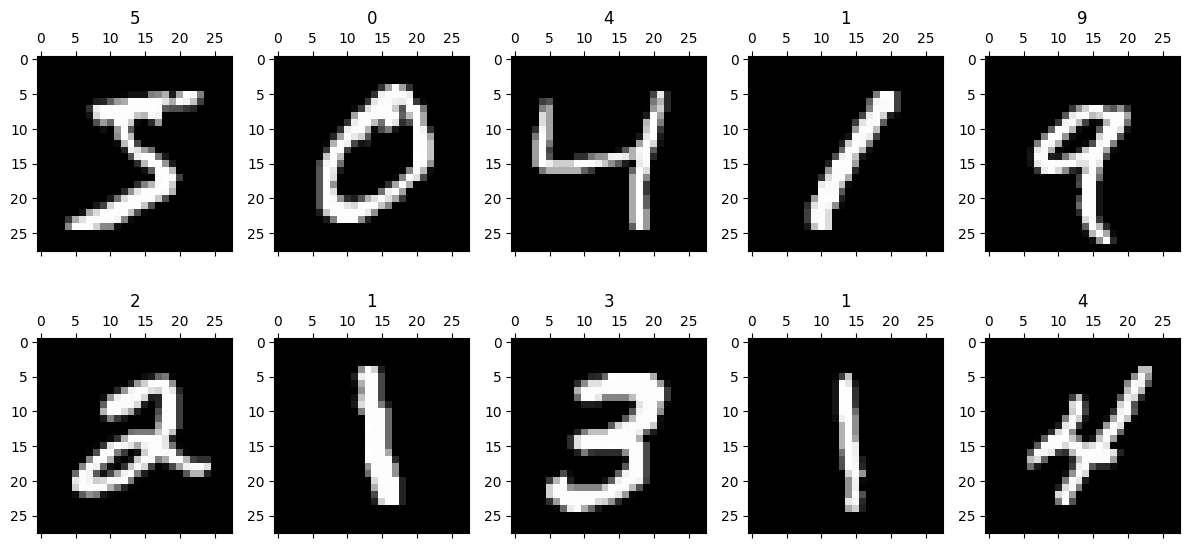

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)
Epoch 1/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - Accuracy: 0.8838 - loss: 0.3932 - val_Accuracy: 0.9573 - val_loss: 0.1443
Epoch 2/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - Accuracy: 0.9661 - loss: 0.1109 - val_Accuracy: 0.9670 - val_loss: 0.1077
Epoch 3/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - Accuracy: 0.9751 - loss: 0.0786 - val_Accuracy: 0.9668 - val_loss: 0.1075
Epoch 4/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - Accuracy: 0.9811 - loss: 0.0627 - val_Accuracy: 0.9719 - val_loss: 0.1024
Epoch 5/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - Accuracy: 0.9835 - loss: 0.0505 - val_Accuracy: 0.9738 - val_loss: 0.1003
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Model Summary


Model: "DFF-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)


---------- Evaluation on Training Data -----------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5923
           1       0.99      0.99      0.99      6742
           2       0.99      0.99      0.99      5958
           3       0.99      0.99      0.99      6131
           4       0.99      0.98      0.99      5842
           5       0.99      0.97      0.98      5421
           6       0.99      0.98      0.99      5918
           7       0.99      0.99      0.99      6265
           8       0.98      0.99      0.98      5851
           9       0.98      0.98      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000


---------- Evaluation on Test Data -----------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.9

In [ ]:
# load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt

# Load digits data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 10 digits in the training set and their true labels
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].matshow(X_train[n], cmap='gray')  # Added cmap='gray' to display images in grayscale
        axs[i, j].set(title=str(y_train[n]))  # Display the true labels
        n += 1
plt.show()

# Reshape and normalize (divide by 255) input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

# Design the Deep FF Neural Network architecture
model = Sequential(name="DFF-Model")  # Model
model.add(Input(shape=(784,), name='Input-Layer'))  # Input Layer - need to specify the shape of inputs
model.add(Dense(128, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2', kernel_initializer='HeNormal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3', kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

# Compile keras model
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['Accuracy'])

# Fit keras model on the dataset
model.fit(X_train, y_train, batch_size=10, epochs=5, verbose=1, validation_split=0.2, shuffle=True)

# Apply the trained model to make predictions
# Predict class labels on training data
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train), axis=1))
# Predict class labels on test data
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test), axis=1))

# Model Performance Summary
print("\nModel Summary")
model.summary()

# Printing the parameters: Deep Feed Forward Neural Network contains more than 100K
#print('Weights and Biases')
# for layer in model_d1.layers:
#    print("Layer: ", layer.name)  # print layer name
#    print(" --Kernels (Weights): ", layer.get_weights()[0])  # kernels (weights)
#    print(" --Biases: ", layer.get_weights()[1])  # biases

print("\n---------- Evaluation on Training Data -----------")
print(classification_report(y_train, pred_labels_tr))

print("\n---------- Evaluation on Test Data -----------")
print(classification_report(y_test, pred_labels_te))


To-Do:
Use the MNIST datasets.

Use the CIFAR10 datasets.

*Record the accuracy corresponding to the number of epochs 5, 50, 100.

*Repeat for CIFAR10 datasets. Note down the changes made and the accuracies obtained.

*Use the Fashion MNIST Dataset

*Perform and Plot the Comparative Analysis.


Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


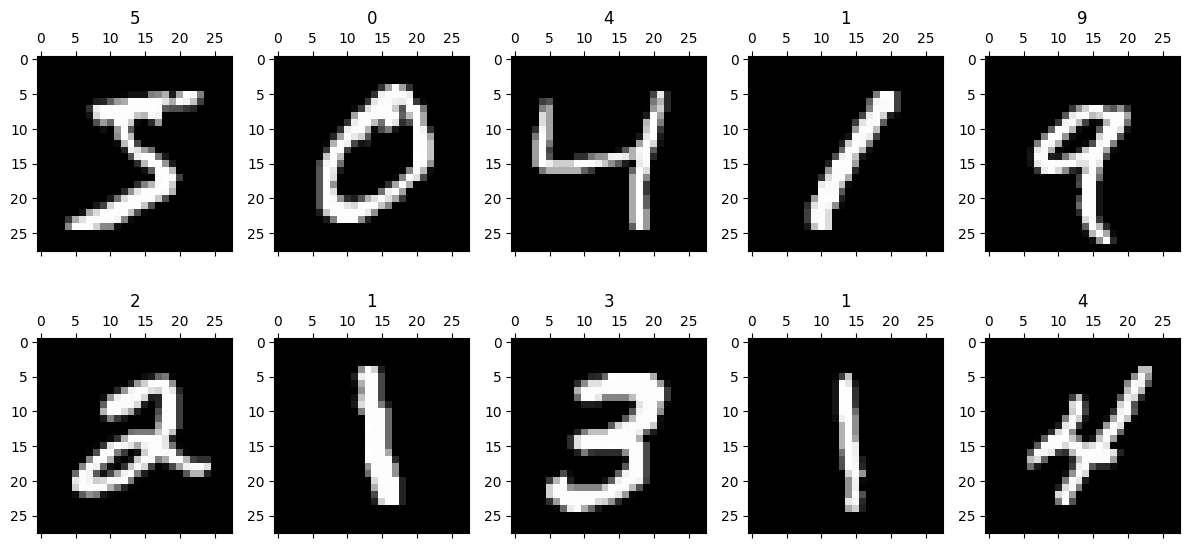

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)
Epoch 1/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - Accuracy: 0.8683 - loss: 0.4141 - val_Accuracy: 0.9557 - val_loss: 0.1415
Epoch 2/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - Accuracy: 0.9656 - loss: 0.1130 - val_Accuracy: 0.9582 - val_loss: 0.1476
Epoch 3/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - Accuracy: 0.9761 - loss: 0.0799 - val_Accuracy: 0.9655 - val_loss: 0.1247
Epoch 4/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - Accuracy: 0.9809 - loss: 0.0616 - val_Accuracy: 0.9713 - val_loss: 0.0993
Epoch 5/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - Accuracy: 0.9827 - loss: 0.0525 - val_Accuracy: 0.9710 - val_loss: 0.1088
Epoch 6/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - Accuracy: 0.9863 - loss: 0.0434 - val_Accuracy: 0.9682 - val_loss: 0.1270
Epoch 7/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - Accuracy: 0.9894 - loss: 0.0338 - val_Accuracy: 0.9708 - val_loss: 0.1155
Epoch 8/50
4

Model: "DFF-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)


---------- Evaluation on Training Data -----------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5923
           1       1.00      0.99      1.00      6742
           2       0.99      1.00      0.99      5958
           3       0.99      0.99      0.99      6131
           4       1.00      0.99      0.99      5842
           5       0.99      0.99      0.99      5421
           6       1.00      0.99      1.00      5918
           7       0.99      0.99      0.99      6265
           8       0.99      0.99      0.99      5851
           9       0.99      0.98      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000


---------- Evaluation on Test Data -----------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.9

In [ ]:
# load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 10 digits in the training set and their true labels
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].matshow(X_train[n], cmap='gray')  # Display images in grayscale
        axs[i, j].set(title=str(y_train[n]))  # Display the true labels
        n += 1
plt.show()

# Reshape and normalize (divide by 255) input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print new shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

# Design the Deep FF Neural Network architecture
model = Sequential(name="DFF-Model")  # Model
model.add(Input(shape=(784,), name='Input-Layer'))  # Input Layer - specify the shape of inputs
model.add(Dense(128, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2', kernel_initializer='HeNormal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3', kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))  # 10 output classes for MNIST

# Compile keras model
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['Accuracy'])

# Fit keras model on the dataset
model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1, validation_split=0.2, shuffle=True)

# Apply the trained model to make predictions
# Predict class labels on training data
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train), axis=1))
# Predict class labels on test data
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test), axis=1))

# Model Performance Summary
print("\nModel Summary")
model.summary()

# Printing the parameters: Deep Feed Forward Neural Network contains more than 100K
#print('Weights and Biases')
# for layer in model_d1.layers:
#    print("Layer: ", layer.name)  # print layer name
#    print(" --Kernels (Weights): ", layer.get_weights()[0])  # kernels (weights)
#    print(" --Biases: ", layer.get_weights()[1])  # biases

print("\n---------- Evaluation on Training Data -----------")
print(classification_report(y_train, pred_labels_tr))

print("\n---------- Evaluation on Test Data -----------")
print(classification_report(y_test, pred_labels_te))


Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


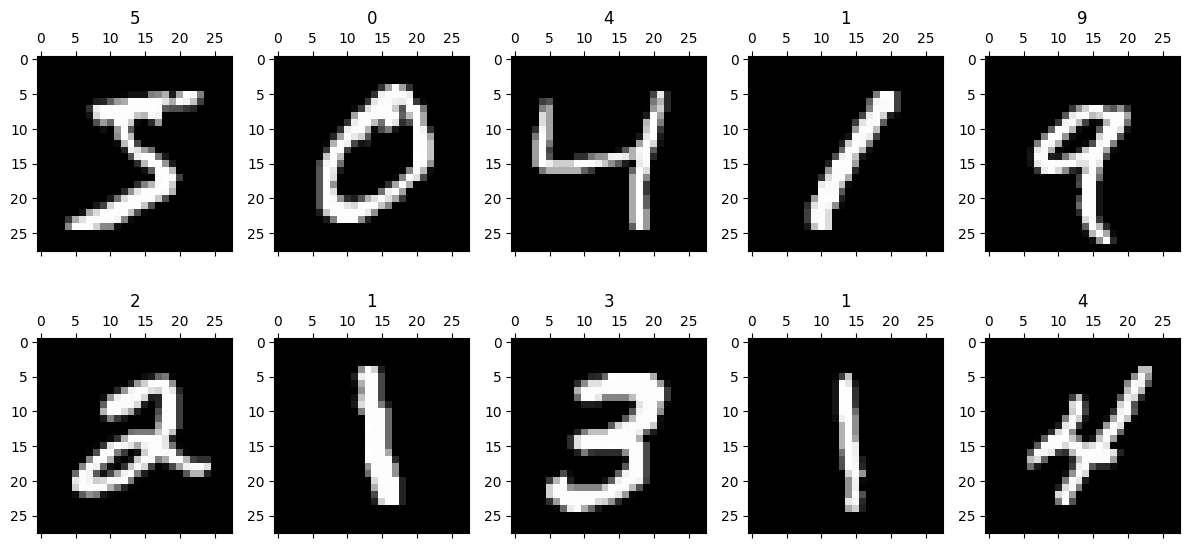

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)
Epoch 1/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - Accuracy: 0.8677 - loss: 0.4324 - val_Accuracy: 0.9564 - val_loss: 0.1467
Epoch 2/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - Accuracy: 0.9652 - loss: 0.1151 - val_Accuracy: 0.9617 - val_loss: 0.1307
Epoch 3/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - Accuracy: 0.9740 - loss: 0.0820 - val_Accuracy: 0.9639 - val_loss: 0.1266
Epoch 4/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - Accuracy: 0.9807 - loss: 0.0615 - val_Accuracy: 0.9722 - val_loss: 0.1015
Epoch 5/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - Accuracy: 0.9840 - loss: 0.0503 - val_Accuracy: 0.9696 - val_loss: 0.1117
Epoch 6/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - Accuracy: 0.9872 - loss: 0.0429 - val_Accuracy: 0.9728 - val_loss: 0.1046
Epoch 7/100
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - Accuracy: 0.9897 - loss: 0.0345 - val_Accuracy: 0.9735 - val_loss: 0.1108
Epoch

Model: "DFF-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)


---------- Evaluation on Training Data -----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       0.99      1.00      0.99      5958
           3       0.99      0.99      0.99      6131
           4       1.00      0.99      0.99      5842
           5       1.00      0.99      0.99      5421
           6       0.99      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       0.99      1.00      0.99      5851
           9       0.99      0.99      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000


---------- Evaluation on Test Data -----------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.9

In [ ]:
# load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 10 digits in the training set and their true labels
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].matshow(X_train[n], cmap='gray')  # Display images in grayscale
        axs[i, j].set(title=str(y_train[n]))  # Display the true labels
        n += 1
plt.show()

# Reshape and normalize (divide by 255) input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print new shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

# Design the Deep FF Neural Network architecture
model = Sequential(name="DFF-Model")  # Model
model.add(Input(shape=(784,), name='Input-Layer'))  # Input Layer - specify the shape of inputs
model.add(Dense(128, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2', kernel_initializer='HeNormal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3', kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))  # 10 output classes for MNIST

# Compile keras model
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['Accuracy'])

# Fit keras model on the dataset
model.fit(X_train, y_train, batch_size=10, epochs=100 , verbose=1, validation_split=0.2, shuffle=True)

# Apply the trained model to make predictions
# Predict class labels on training data
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train), axis=1))
# Predict class labels on test data
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test), axis=1))

# Model Performance Summary
print("\nModel Summary")
model.summary()

# Printing the parameters: Deep Feed Forward Neural Network contains more than 100K
#print('Weights and Biases')
# for layer in model_d1.layers:
#    print("Layer: ", layer.name)  # print layer name
#    print(" --Kernels (Weights): ", layer.get_weights()[0])  # kernels (weights)
#    print(" --Biases: ", layer.get_weights()[1])  # biases

print("\n---------- Evaluation on Training Data -----------")
print(classification_report(y_train, pred_labels_tr))

print("\n---------- Evaluation on Test Data -----------")
print(classification_report(y_test, pred_labels_te))
